In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


df = pd.read_csv('fraud_prediction.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [2]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [3]:
target_labels = k_means.predict(df)
target_labels

array([0, 0, 0, ..., 1, 0, 1])

# Finding the Optimal # of Clusters

In [4]:
k_means.inertia_

4.993728940180061e+17

In [5]:
clusters = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

for cluster in clusters:
    k_means = KMeans(n_clusters = cluster)
    k_means.fit(df)
    inertia_values.append(k_means.inertia_)

In [6]:
def plot_clusters():
    sns.lineplot(x = clusters, y = inertia_values)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia value')
    plt.title('number of Clusters vs. Inertia Values')
    plt.show()

#The elbow point will be the most optimal # of clusters, even though it doesnt have the lowest inertia it is 
#still able to generalize

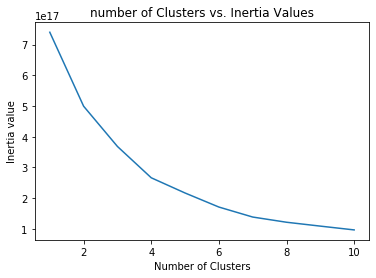

In [7]:
plot_clusters()

# Standardizing Variables

In [8]:
scale_data = StandardScaler()

In [9]:
scale_data.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
df_scaled = scale_data.transform(df)

In [11]:
k_means = KMeans(n_clusters = 2)

In [12]:
k_means.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
k_means.inertia_

275512.43833310885

In [14]:
clusters = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

for cluster in clusters:
    k_means = KMeans(n_clusters = cluster)
    k_means.fit(df_scaled)
    inertia_values.append(k_means.inertia_)

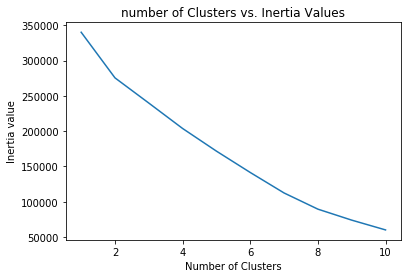

In [15]:
plot_clusters()

# Applying Dimensionality Reduction (Principal Component Analysis)

In [16]:
pca_model = PCA(n_components = 5)

In [17]:
pca_model.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca_transformation = pca_model.transform(df_scaled)

In [19]:
#Checking to see if we reduced it to 5 features correctly

pca_transformation.shape

(28345, 5)

# Rerunning Model with transformed dataset

In [20]:
k_means = KMeans(n_clusters = 2)

In [21]:
k_means.fit(pca_transformation)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
k_means.inertia_

190325.3219271529

In [23]:
components = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

for comp in components:
    pca_model = PCA(n_components = comp)
    pca_model.fit(df_scaled)
    pca_transformation = pca_model.transform(df_scaled)
    k_means = KMeans(n_clusters = 2)
    k_means.fit(pca_transformation)
    inertia_values.append(k_means.inertia_)

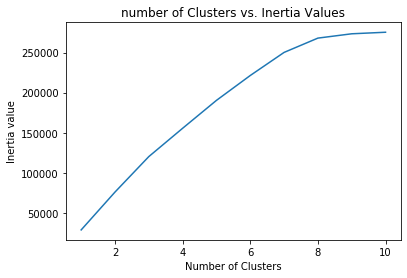

In [24]:
plot_clusters()